In [14]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home directory

In [15]:
# Load in dataset for the experiment for a particular month
exp_name = 'test'
month = 1
file_name = 'atmos_monthly.nc'
data_dir = os.path.join(os.environ['GFDL_DATA'], exp_name, 'run%04d'%month)
data_file = os.path.join(data_dir, file_name)
d = xr.open_dataset(data_file, decode_times=False)

In [34]:
# See what is contained in dataset
d

<xarray.Dataset>
Dimensions:        (lon: 64, lonb: 65, lat: 32, latb: 33, time: 10, nv: 2,
                    phalf: 41, pfull: 40)
Coordinates:
  * lon            (lon) float64 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * lonb           (lonb) float64 -2.812 2.812 8.438 14.06 ... 345.9 351.6 357.2
  * lat            (lat) float64 -85.76 -80.27 -74.74 ... 74.74 80.27 85.76
  * latb           (latb) float64 -90.0 -83.21 -77.61 ... 77.61 83.21 90.0
  * time           (time) float64 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5
  * nv             (nv) float64 1.0 2.0
  * phalf          (phalf) float64 0.0 0.04682 0.1155 ... 759.6 871.5 1e+03
  * pfull          (pfull) float64 0.01722 0.07865 0.1807 ... 710.2 814.9 935.0
Data variables: (12/17)
    ps             (time, lat, lon) float32 1e+05 1e+05 ... 1.008e+05 1.008e+05
    bk             (phalf) float32 0.0 4.682e-05 0.0001155 ... 0.7596 0.8715 1.0
    pk             (phalf) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precipitation  (time, lat, lon) float32 0.0 0.0 0.0 ... 1.118e-06 1.136e-06
    t_surf         (time, lat, lon) float32 258.6 258.6 258.6 ... 258.4 258.4
    sphum          (time, pfull, lat, lon) float32 2e-06 2e-06 ... 0.0005068
    ...             ...
    olr            (time, lat, lon) float32 268.1 268.1 268.1 ... 220.1 220.1
    swdn_toa       (time, lat, lon) float32 532.7 538.8 538.8 ... 0.0 0.0 0.0
    average_T1     (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0
    average_T2     (time) float64 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0
    average_DT     (time) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    time_bounds    (time, nv) float64 0.0 1.0 1.0 2.0 2.0 ... 8.0 9.0 9.0 10.0
Attributes:
    filename:   /gpfs1/scratch/other/jamd1/isca_work/experiment/test/run/atmo...
    title:      FMS Model results
    grid_type:  regular
    grid_tile:  N/A

Text(0, 0.5, 'Surface Temperature / $°C$')

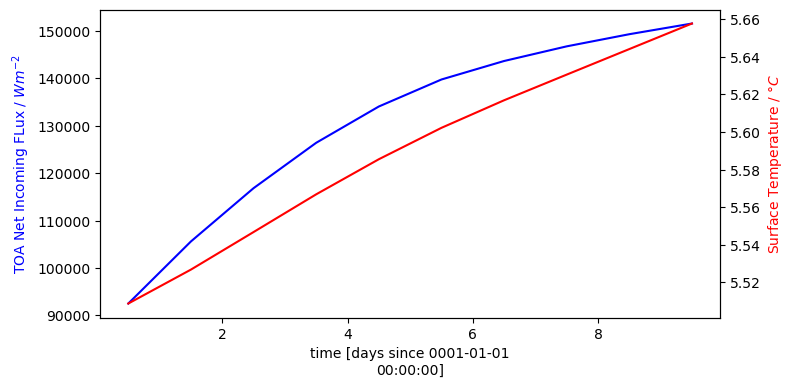

In [32]:
# Plot evolution of net flux and temperature to see how long it takes to spin up

fig, ax1 = plt.subplots(1,1, figsize=(8, 4))
olr_sum = d.olr.sum(dim = ['lon','lat'])
short_wave_sum = d.swdn_toa.sum(dim = ['lon','lat'])
net_flux = short_wave_sum - olr_sum
net_flux.plot.line(ax=ax1, color='b')
ax1.set_ylabel('TOA Net Incoming FLux / $Wm^{-2}$', color='b')
t_surf_mean = d.t_surf.mean(dim = ['lon','lat']) - 273.15  # In Celsius
ax2 = ax1.twinx()
t_surf_mean.plot.line(ax=ax2, color='r')
ax2.set_ylabel('Surface Temperature / $°C$', color='r')